<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S8_C1_Clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os    # la librería necesaria para la ruta de la carpeta
folder_path = '/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET' # ruta de la carpeta
os.chdir(folder_path) # ruta de la carpeta

#mostar lista de archivos
os.listdir()

['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl',
 'auto-mpg.names',
 'auto-mpg.data-original',
 'auto-mpg.data',
 'Index',
 'mpg-limpios-procesados.xlsx',
 'Classification_Tests.csv',
 'heart_attack_risk_dataset.csv',
 'generated_classification_data.csv',
 'Mall_Customers.csv']

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Detecta y contabiliza los null
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
# Se elimina porque no aporta a los datos, solo registra la id
df = df.drop(['CustomerID'], axis=1)

In [ ]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [ ]:
# Inicializar el encoder
le = LabelEncoder()
# Aplicar el encoder a la columna 'Gender'
df['Gender_TAG'] = le.fit_transform(df['Gender'])

In [ ]:
# Muestra las etiquetas que el modelo detectó
le.classes_

array(['Female', 'Male'], dtype=object)

In [ ]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_TAG
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0


In [ ]:
df_tag = df

In [ ]:
df = df.drop(['Gender'], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Gender_TAG              200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


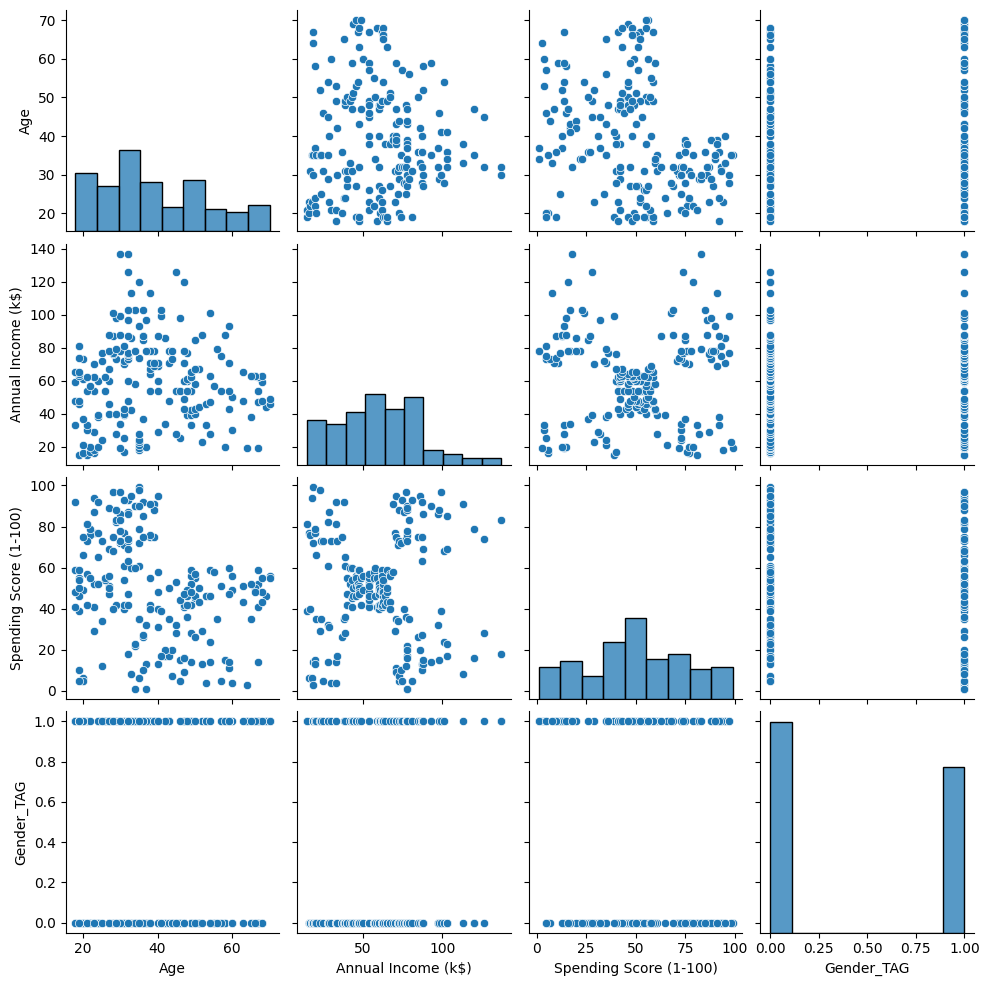

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender_TAG
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Gender_TAG,0.060867,0.056410,-0.058109,1.000000


# Selección de variables

* se observa que los hombres y las mujeres tiene los mismos comportamientos para edad, ingresos y compras, por lo tanto se eliminan del df

In [ ]:
df = df.drop(['Gender_TAG'], axis=1)



In [ ]:
df.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


# PARTE 2. Cuántos clusters necesitamos?

Aplicamos el método del cliente donde medimos la inercia del grupo en busca del punto de inflexión

* inercia: es la suma de los cuadrados de las distancias de los datos con el centroide
* hallar el codo : son la cantidad de los centroides que serian como el "punto de inflexion"

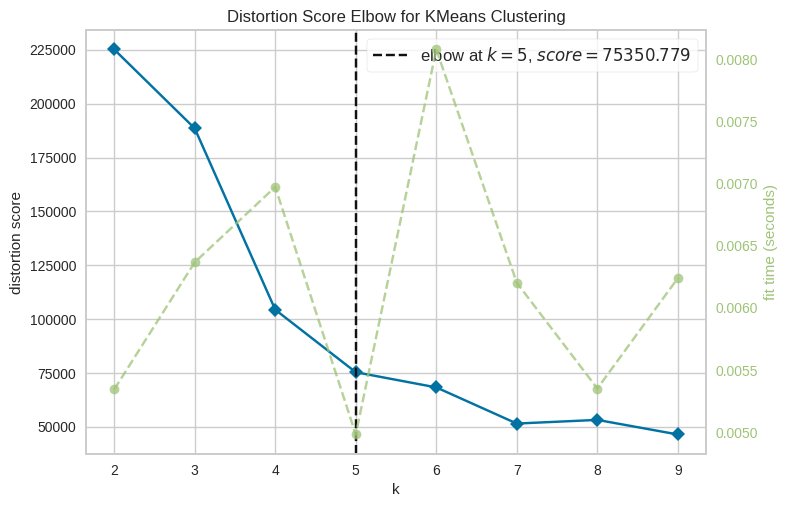

In [ ]:
# Código del notebook
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df)
visualizer.show()
plt.show()

con el análisis del mátodo del codo se observa que un numero pertinente de centroides es 5

Concepto: **n_clusters=5**
* Cada clúster representa un grupo de datos con características similares.
* El valor de n_clusters define la cantidad de estos grupos.

In [ ]:
#model = KMeans(n_clusters=5, random_state=1).fit(df)
#model_5k = model.fit(df)
model_5k = KMeans(n_clusters=5, random_state=1).fit(df)
model_5k.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348]])

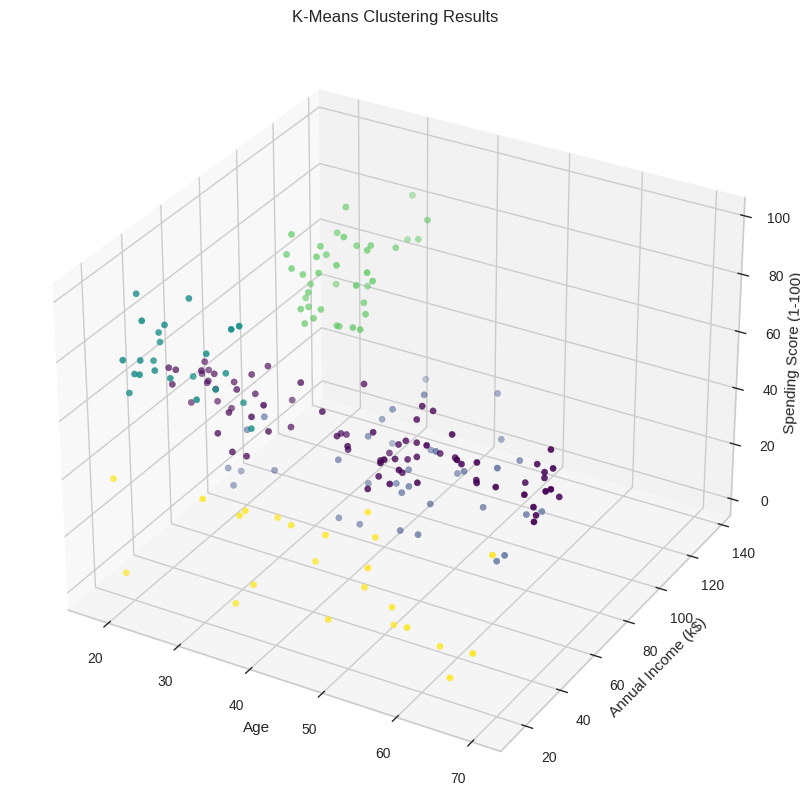

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot data points
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=model_5k.labels_, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-Means Clustering Results')
plt.show()

In [ ]:
df.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Etiquetar los datos del df en los clusters

la df original se le agrega la columna con las etiquetas de los clusters

In [ ]:
df_5k = df.copy()
df_5k['Cluster'] = model_5k.labels_
df_5k.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


In [ ]:
df_5k.groupby('Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,43.088608,55.291139,49.569620
1,40.666667,87.750000,17.583333
2,25.521739,26.304348,78.565217
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


 los que tienen alrededor de 40 años (cluster 1) y los que tienen alrededor de 32 años (cluster 3) hagames una propaganda agresiva

In [ ]:
Cluster_0 = df_5k[df_5k['Cluster'] == 0]
Cluster_0.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,79.000000,79.000000,79.000000,79.0
mean,43.088608,55.291139,49.569620,0.0
std,16.478572,8.710665,6.242295,0.0
min,18.000000,40.000000,35.000000,0.0
25%,27.000000,48.000000,44.500000,0.0
50%,47.000000,54.000000,50.000000,0.0
75%,54.500000,62.000000,55.000000,0.0
max,70.000000,76.000000,60.000000,0.0


In [ ]:
Cluster_1 = df_5k[df_5k['Cluster'] == 0]
Cluster_1.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,79.000000,79.000000,79.000000,79.0
mean,43.088608,55.291139,49.569620,0.0
std,16.478572,8.710665,6.242295,0.0
min,18.000000,40.000000,35.000000,0.0
25%,27.000000,48.000000,44.500000,0.0
50%,47.000000,54.000000,50.000000,0.0
75%,54.500000,62.000000,55.000000,0.0
max,70.000000,76.000000,60.000000,0.0


In [ ]:
Cluster_2 = df_5k[df_5k['Cluster'] == 0]
Cluster_2.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,79.000000,79.000000,79.000000,79.0
mean,43.088608,55.291139,49.569620,0.0
std,16.478572,8.710665,6.242295,0.0
min,18.000000,40.000000,35.000000,0.0
25%,27.000000,48.000000,44.500000,0.0
50%,47.000000,54.000000,50.000000,0.0
75%,54.500000,62.000000,55.000000,0.0
max,70.000000,76.000000,60.000000,0.0


In [ ]:
Cluster_3 = df_5k[df_5k['Cluster'] == 0]
Cluster_3.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,79.000000,79.000000,79.000000,79.0
mean,43.088608,55.291139,49.569620,0.0
std,16.478572,8.710665,6.242295,0.0
min,18.000000,40.000000,35.000000,0.0
25%,27.000000,48.000000,44.500000,0.0
50%,47.000000,54.000000,50.000000,0.0
75%,54.500000,62.000000,55.000000,0.0
max,70.000000,76.000000,60.000000,0.0


In [ ]:
Cluster_4 = df_5k[df_5k['Cluster'] == 0]
Cluster_4.describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,79.000000,79.000000,79.000000,79.0
mean,43.088608,55.291139,49.569620,0.0
std,16.478572,8.710665,6.242295,0.0
min,18.000000,40.000000,35.000000,0.0
25%,27.000000,48.000000,44.500000,0.0
50%,47.000000,54.000000,50.000000,0.0
75%,54.500000,62.000000,55.000000,0.0
max,70.000000,76.000000,60.000000,0.0


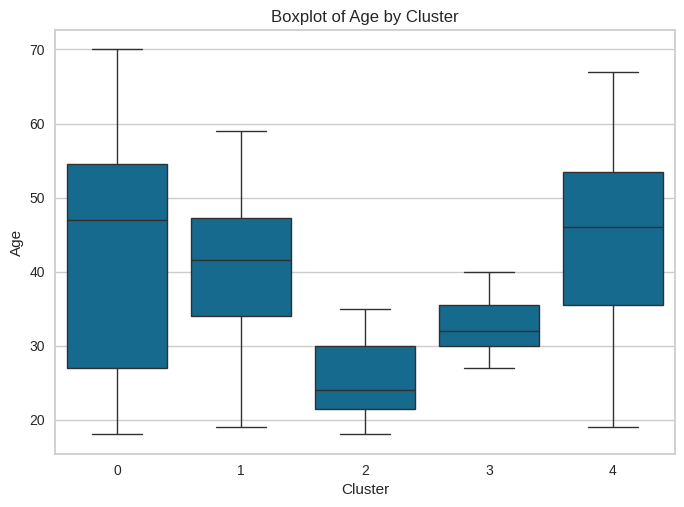

In [ ]:
sns.boxplot(x='Cluster', y ='Age', data=df_5k)
plt.title('Boxplot of Age by Cluster')
plt.show()

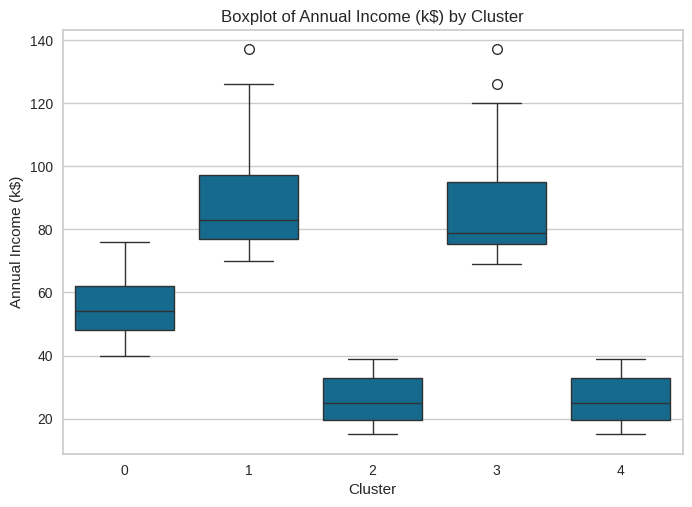

In [ ]:
sns.boxplot(x='Cluster', y ='Annual Income (k$)', data=df_5k)
plt.title('Boxplot of Annual Income (k$) by Cluster')
plt.show()

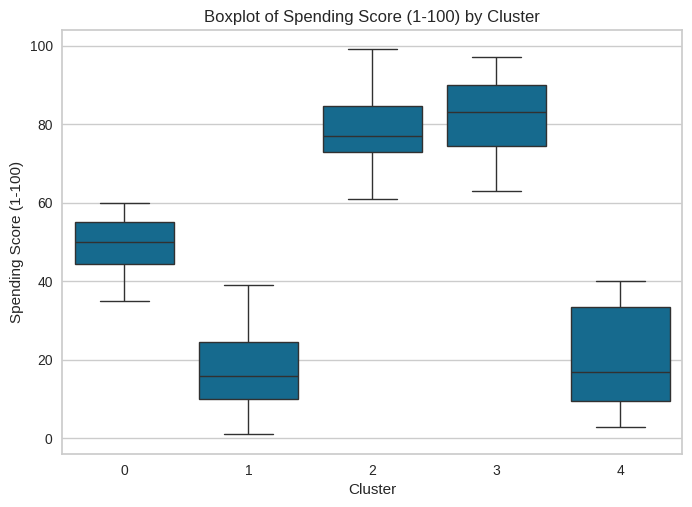

In [ ]:
sns.boxplot(x='Cluster', y ='Spending Score (1-100)', data=df_5k)
plt.title('Boxplot of Spending Score (1-100) by Cluster')
plt.show()

# PARTE X. Analisis de segmento de

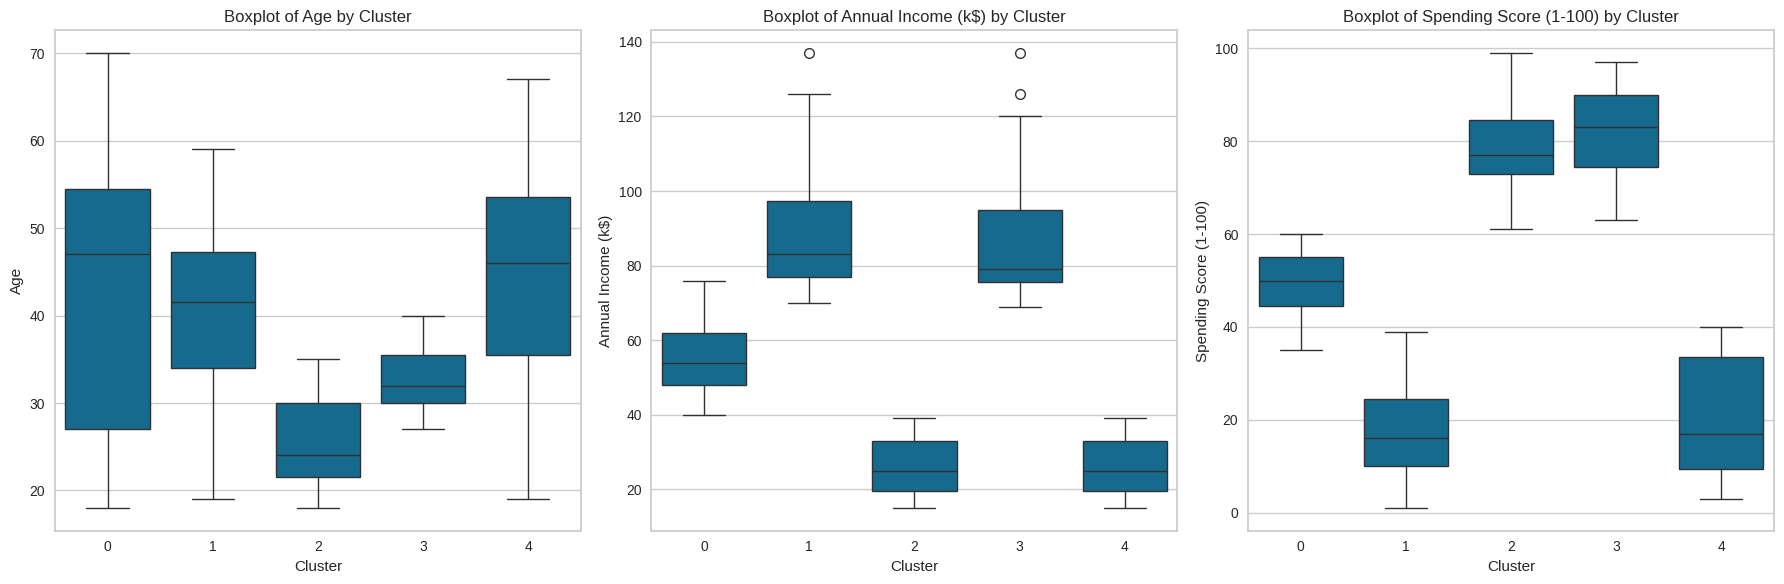

In [ ]:
# Crear una figura con subgráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para 'Age' por 'Cluster'
sns.boxplot(ax=axes[0], x='Cluster', y='Age', data=df_5k)
axes[0].set_title('Boxplot of Age by Cluster')

# Boxplot para 'Annual Income (k$)' por 'Cluster'
sns.boxplot(ax=axes[1], x='Cluster', y='Annual Income (k$)', data=df_5k)
axes[1].set_title('Boxplot of Annual Income (k$) by Cluster')

# Boxplot para 'Spending Score (1-100)' por 'Cluster'
sns.boxplot(ax=axes[2], x='Cluster', y='Spending Score (1-100)', data=df_5k)
axes[2].set_title('Boxplot of Spending Score (1-100) by Cluster')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

### Cluster 0.

**Edad:** la distribucion es muy amplia, la mediana la esdad es de 50 años, el 50% de estos clientes tienen edades entre '28 y 53'

**Ingreso anual:** este grupo de personas tienen ingresos medio-bajo, la mayoria ganan entre (45 a 61 k)

**Puntaje de gasto:** este grupo tiene gasto moderado (45 y 55 aprox.)

En conclusión este Cluster representa a la poblacion que tiene ingresos medios y patrones de consumo medio.

***Experto:*** podria enfocarse en campañas de productos básicos ( mercado

In [ ]:
Cluster_3 = df_5k[df_5k['Cluster'] == 2]

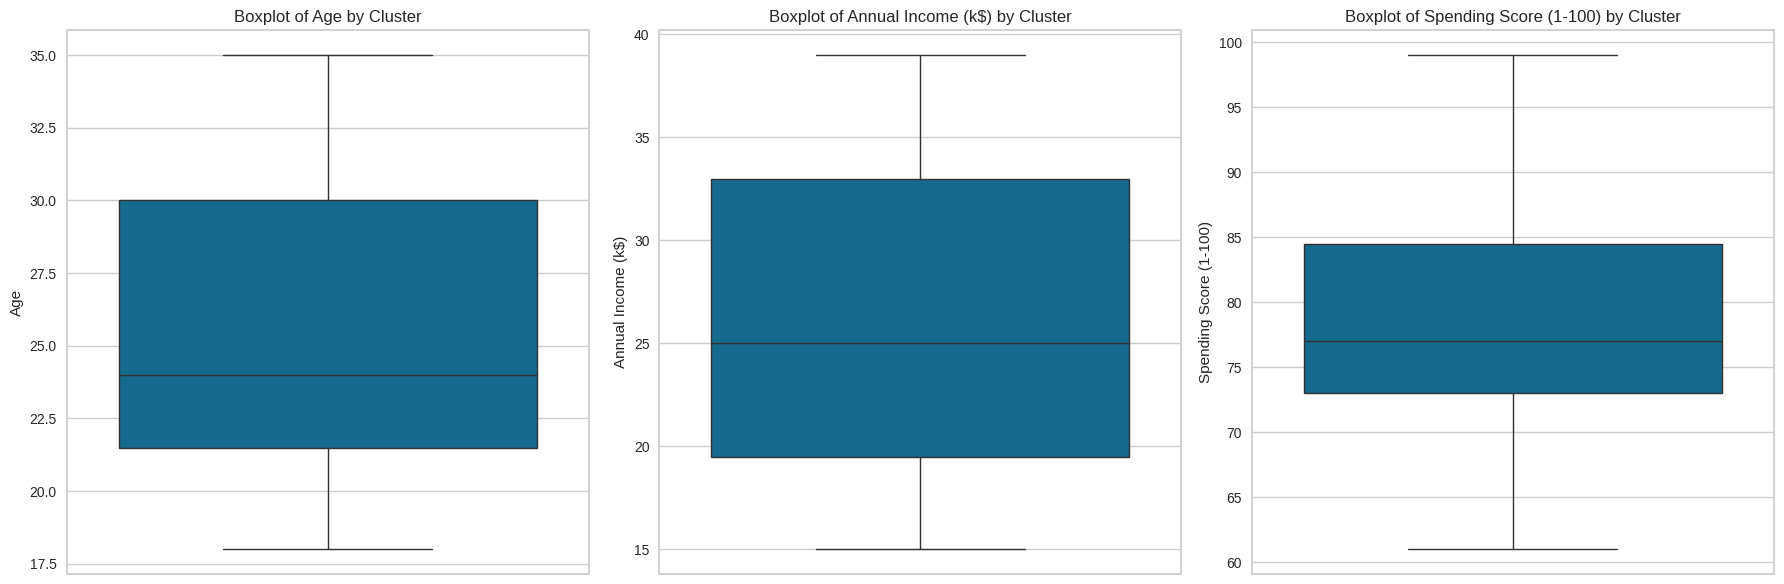

In [ ]:
# Crear una figura con subgráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para 'Age' por 'Cluster'
sns.boxplot(ax=axes[0], y='Age', data=Cluster_3)
axes[0].set_title('Boxplot of Age by Cluster')

# Boxplot para 'Annual Income (k$)' por 'Cluster'
sns.boxplot(ax=axes[1], y='Annual Income (k$)', data=Cluster_3)
axes[1].set_title('Boxplot of Annual Income (k$) by Cluster')

# Boxplot para 'Spending Score (1-100)' por 'Cluster'
sns.boxplot(ax=axes[2], y='Spending Score (1-100)', data=Cluster_3)
axes[2].set_title('Boxplot of Spending Score (1-100) by Cluster')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

Cluster 0.
Edad: la distribucion es muy amplia, la mediana la esdad es de 25 años, el 50% de estos clientes tienen edades entre '22 y 30'

Ingreso anual: este grupo de personas tienen ingresos bajos, la mayoria ganan entre (19 a 34 k)

Puntaje de gasto: este grupo tiene gasto alto (73 y 84 aprox.)

En conclusión este Cluster representa a la poblacion que tiene ingresos bajos y patrones de consumo alto.

Experto: podria enfocarse en campañas de productos entree tecnologia de alta gama y productos de alto valor qgregado y personalizados

### PARTE X. Medición de la calidad de los grupos

La puntuación de silueta es una métrica que mide qué tan similares son los puntos dentro de un cluster en comparación con los puntos de otros clusters.

Donde:

( a ): Distancia promedio entre un punto y los demás puntos del mismo cluster.
( b ): Distancia promedio entre un punto y los puntos del cluster más cercano.
La puntuación varía entre -1 y 1:

Valores cercanos a 1 indican que los puntos están bien agrupados. Valores cercanos a 0 indican que los puntos están cerca de los límites entre clusters. Valores negativos indican que los puntos están mal asignados.

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
labels = model_5k.labels_
silhouette_avg = silhouette_score(df, labels)
print("Puntuación de silueta:", silhouette_avg)

Puntuación de silueta: 0.44428597560893024


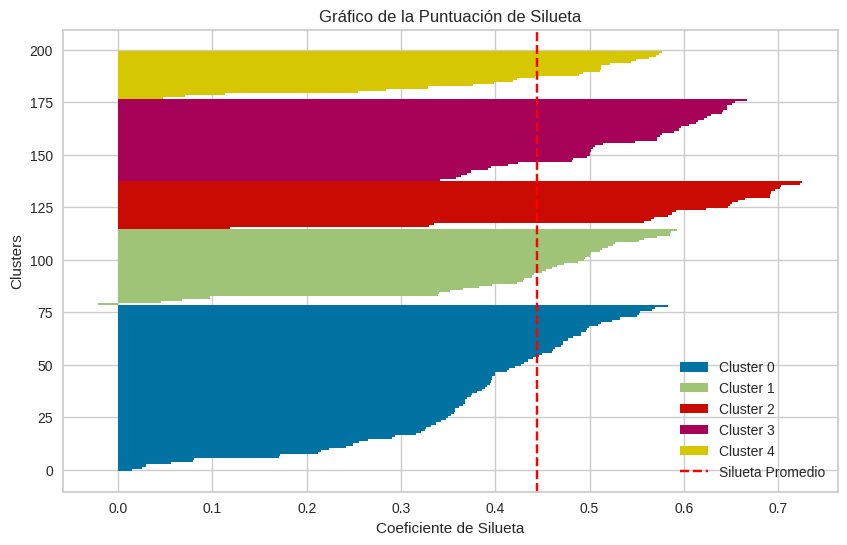

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Calcular los valores de la puntuación de silueta
silhouette_vals = silhouette_samples(df, labels)

# Gráfico de silueta
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
handles = []  # Para guardar los handles de la leyenda
for i in range(model_5k.n_clusters):
    cluster_silhouette_vals = silhouette_vals[labels == i]

    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    bar = plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)


    # Guardar el handle de la barra para la leyenda
    handles.append(bar[0])

    y_lower += len(cluster_silhouette_vals)

# Línea de la puntuación de silueta promedio
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Títulos y etiquetas
plt.title("Gráfico de la Puntuación de Silueta")
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Clusters")

# Mostrar la leyenda
plt.legend(handles=handles + [plt.Line2D([0], [0], color='red', linestyle='--')],
           labels=[f'Cluster {i}' for i in range(model_5k.n_clusters)] + ['Silueta Promedio'],)
           #loc='best')

# Mostrar el gráfico
plt.show()

# Pendiente con las leyendas

In [ ]:
import plotly.express as px

# Crear un DataFrame con las columnas necesarias
df_3d = df.copy()
df_3d['Cluster'] = model_5k.labels_

# Crear el gráfico 3D interactivo
fig = px.scatter_3d(df_3d,
                    x='Age',
                    y='Annual Income (k$)',
                    z='Spending Score (1-100)',
                    color='Cluster',
                    color_continuous_scale='viridis',
                    title='K-Means Clustering Results',
                    labels={'Age': 'Age', 'Annual Income (k$)': 'Annual Income (k$)', 'Spending Score (1-100)': 'Spending Score (1-100)'},
                    opacity=0.7)

# Mostrar el gráfico interactivo
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Crear un DataFrame con las columnas necesarias
df_3d = df.copy()
df_3d['Cluster'] = model_5k.labels_

# Obtener los centroides de los clusters
centroids = model_5k.cluster_centers_

# Crear un DataFrame para los centroides
centroids_df = pd.DataFrame(centroids, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
centroids_df['Cluster'] = np.arange(model_5k.n_clusters)

# Crear el gráfico 3D interactivo con los datos
fig = px.scatter_3d(df_3d,
                    x='Age',
                    y='Annual Income (k$)',
                    z='Spending Score (1-100)',
                    color='Cluster',
                    color_continuous_scale='viridis',
                    title='K-Means Clustering Results',
                    labels={'Age': 'Age', 'Annual Income (k$)': 'Annual Income (k$)', 'Spending Score (1-100)': 'Spending Score (1-100)'},
                    opacity=0.7)

# Agregar los centroides al gráfico como puntos destacados
fig.add_scatter3d(x=centroids_df['Age'],
                  y=centroids_df['Annual Income (k$)'],
                  z=centroids_df['Spending Score (1-100)'],
                  mode='markers',
                  marker=dict(size=10, color='red', symbol='circle'),
                  name='Centroids')

# Mostrar el gráfico interactivo
fig.show()